In [1]:
# Part 1
# The intendent audiences are water researchers, water consumers and water providers

In [2]:
# Import the necessary Python libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure
import numpy as np

In [3]:
# Read the data file
# NOTE: This assumes the data file is in the same folder as this script

df = pd.read_csv('Single-Family_ResidentialWaterUseDataSample.csv', header=12, sep=',',
                 index_col=0, parse_dates=True, infer_datetime_format=True, low_memory=False)

V_pulse        = 0.0087 #gallons
Delta_time     = 4.9    #seconds
df['Q_gpm']    = df['Pulse_Count']*V_pulse/Delta_time*60

In [4]:
# Data Analysis

print (df.head(5))

print ('\nThe begin date is ' + str(df.index.min()))
print ('The end date   is ' + str(df.index.max()))

print('\nNumber of All Readings is     ' + str(len(df)))
print('Number of NonZero Readings is  ' + str(np.count_nonzero(df['Q_gpm']!=0)))
print('Number of Zero Readings is     ' + str(np.count_nonzero(df['Q_gpm']==0)))

max_Q = max(df['Q_gpm'])
max_Q_date = df.index[df['Q_gpm']==max_Q]
print ("\nMaximum Flow is  "+ str(round(max_Q,3)) 
       + ' gpm at time step  ' +  str(max_Q_date[0]))

min_Q = round(min(df['Q_gpm']),3)
print('Minimum Flow is   ' + str(min_Q) + '   gpm')

mean_Q = np.mean(df['Q_gpm'])
print ("Mean Flow is      "+ str(round(mean_Q,2))+ '  gpm')

                     Pulse_Count  Q_gpm
DateTimeMST                            
2018-06-04 14:14:39            0    0.0
2018-06-04 14:14:43            0    0.0
2018-06-04 14:14:47            0    0.0
2018-06-04 14:14:51            0    0.0
2018-06-04 14:14:55            0    0.0

The begin date is 2018-06-04 14:14:39
The end date   is 2018-08-27 10:58:00

Number of All Readings is     1641706
Number of NonZero Readings is  940336
Number of Zero Readings is     701370

Maximum Flow is  39.629 gpm at time step  2018-06-13 07:47:03
Minimum Flow is   0.0   gpm
Mean Flow is      0.77  gpm


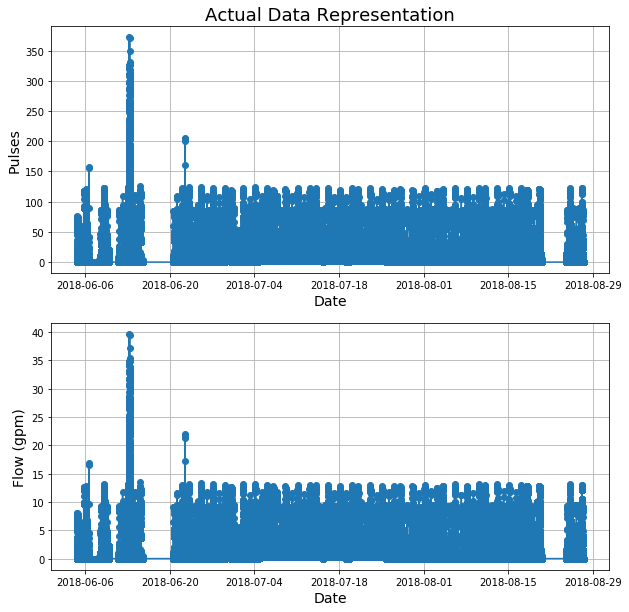

In [5]:
# Visualization of Actual Data by pulses and flow

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(df.index, df['Pulse_Count'], 'o-', label='Pulse Count')
ax1.set_ylabel('Pulses', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax1.grid(True)
plt.title('Actual Data Representation', fontsize=18)

ax1 = fig.add_subplot(2, 1, 2)
ax1.plot(df.index, df['Q_gpm'], 'o-', label='Pulse Count')
ax1.set_ylabel('Flow (gpm)', fontsize=14)
ax1.set_xlabel('Date', fontsize=14)
ax1.grid(True)

plt.show()

In [6]:
# To Over Come Missing Time Steps in the Original Data Frame,
# Data Frame Will Be Resampled to '5 Seconds' Time Step

highfreq = df.resample('5S', base=0).mean()
highfreq = highfreq.fillna(0)

# Convert Series Analysis to Dataframe
highfreqdf = pd.DataFrame(data=highfreq, index=highfreq.index)

highfreqdf['Vol_g']    = highfreqdf['Q_gpm']*5/60
highfreqdf['Cumm_Vol'] = highfreqdf['Vol_g'].cumsum()

max_Q = max(highfreqdf['Q_gpm'])
max_Q_date = highfreqdf.index[highfreqdf['Q_gpm']==max_Q]
print ("Maximum Flow is  "+ str(round(max_Q,3)) 
       + ' gpm at time step  ' +  str(max_Q_date[0]))

min_Q = round(min(highfreqdf['Q_gpm']),3)
print('Minimum Flow is   ' + str(min_Q) + '   gpm')

mean_Q = np.mean(highfreqdf['Q_gpm'])
print ("Mean Flow is      "+ str(round(mean_Q,2))+ '  gpm')

Tot_V = sum(highfreqdf['Vol_g'])
time=len(highfreqdf)*5/60 #min
print('\nTotal Volume Passed Trough ' + str(round(time/60/24,2)) + ' days Is '+ str(round(Tot_V,2)) + ' gallons')

Maximum Flow is  39.629 gpm at time step  2018-06-13 07:47:00
Minimum Flow is   0.0   gpm
Mean Flow is      0.68  gpm

Total Volume Passed Trough 83.86 days Is 82548.99 gallons


In [7]:
# Aggregate Data to Daily Average

#The begin date is 2018-06-04 14:14:39
#The end date is 2018-08-27 10:58:00

beginDate = '2018-06-05 00:00:00'
endDate = '2018-08-26 23:59:59'
df_sub = df[beginDate:endDate]

daily = df_sub.resample('24H', base=0).mean()
daily = daily.fillna(0)

# Convert Series Analysis to Dataframe
dailydf = pd.DataFrame(data=daily, index=daily.index)

dailydf['Vol_g']    = dailydf['Q_gpm']*60*24
dailydf['Cumm_Vol'] = dailydf['Vol_g'].cumsum()

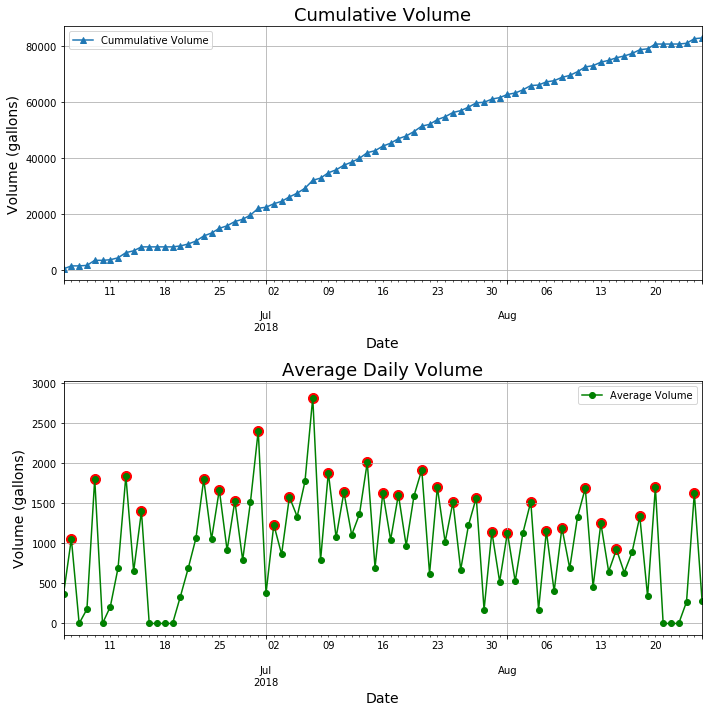


Total Volume Passed  is 82783.41 gallon
Average Daily Volume is 997.39 gallon


In [8]:
# Visualization of Volume Passed (Daily)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(2, 1, 1)
dailydf.plot(y='Cumm_Vol', ax=ax, kind='line', use_index=True, style='-', marker='^', label='Cummulative Volume')
ax.set_ylabel('Volume (gallons)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)
plt.title('Cumulative Volume', fontsize=18)

ax = fig.add_subplot(2, 1, 2)
dailydf.plot(y='Vol_g', ax=ax, kind='line', use_index=True, style='-', marker='o', label='Average Volume', color='g')
ax.set_ylabel('Volume (gallons)', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.grid(True)
plt.title('Average Daily Volume', fontsize=18)

# Find Global Maximum
max_day_v = max(dailydf['Vol_g'])
max_day_date = dailydf.index[dailydf['Vol_g']==max_day_v]

# Find and Print local Maiximum
loc_max = dailydf['Vol_g'][(dailydf['Vol_g'].shift(1) < dailydf['Vol_g']) & (dailydf['Vol_g'].shift(-1) < dailydf['Vol_g'])]
loc_max = round(loc_max, 2)

# Plot and Anotate Local Maiximum
plt.scatter(loc_max.index, loc_max, c='r', s=100)

fig.tight_layout()
plt.show()


Tot_V = sum(dailydf['Vol_g'])
print ("\nTotal Volume Passed  is "+ str(round(Tot_V,2))+ ' gallon')

Mean_V= np.mean(dailydf['Vol_g'])
print ("Average Daily Volume is "+ str(round(Mean_V,2))+ ' gallon')


